# Extract skewers from snapshot after rescaling the temperature

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120
import extract_skewers
import read_gadget
import fake_spectra.tempdens as tdr
import fake_spectra.griddedspectra as grid_spec

### Extract a single snapshot, multiple temperatures

In [2]:
basedir='/Users/font/CosmoData/test_sim_emulator/test_march_2019/'
skewers_dir=basedir+'/output/skewers/'
test_snap_num=8
n_skewers=10
width_Mpc=0.1

In [3]:
# list of temperature scalings
scales_T0=[0.8,1.0,1.2]
#scales_gamma=[0.8,1.0,1.2]
scales_gamma=[1.0]

8 z 3.500000045
dv/dX (z=3.500000) = 80.641745
width kms = 8.06417448245
T_0 = 12971.895006, gamma=1.407618
scale 0.8 1.0
use 10377.5160051 1.40761802185
filename skewers_8_Ns10_wM0.1_sT0.8_sg1.0.hdf5
skewers_8_Ns10_wM0.1_sT0.8_sg1.0.hdf5 already exists in /Users/font/CosmoData/test_sim_emulator/test_march_2019//output/skewers/
Reloading from snapshot (will save to:  /Users/font/CosmoData/test_sim_emulator/test_march_2019//output/skewers/skewers_8_Ns10_wM0.1_sT0.8_sg1.0.hdf5  )
100  sightlines. resolution:  8.06417448245  z= 3.500000045
10377.5160051 9.27017853326 0.11495508379
scale 1.0 1.0
use 12971.8950064 1.40761802185
filename skewers_8_Ns10_wM0.1_sT1.0_sg1.0.hdf5
skewers_8_Ns10_wM0.1_sT1.0_sg1.0.hdf5 already exists in /Users/font/CosmoData/test_sim_emulator/test_march_2019//output/skewers/
Reloading from snapshot (will save to:  /Users/font/CosmoData/test_sim_emulator/test_march_2019//output/skewers/skewers_8_Ns10_wM0.1_sT1.0_sg1.0.hdf5  )
100  sightlines. resolution:  8.06417448

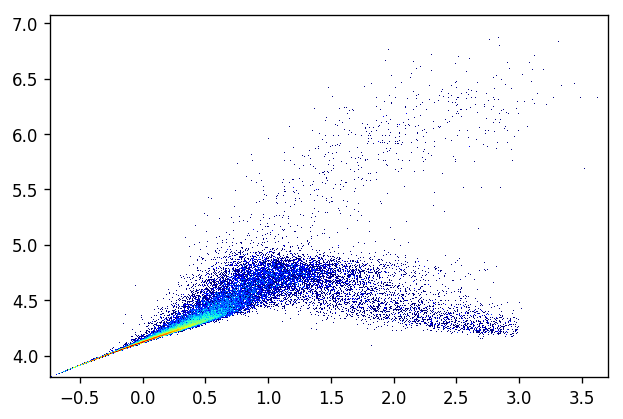

In [4]:
# extract skewers and store to file
info=extract_skewers.rescale_write_skewers_z(basedir,num=test_snap_num,skewers_dir=skewers_dir,
                        n_skewers=n_skewers,width_Mpc=width_Mpc,scales_T0=scales_T0,scales_gamma=scales_gamma)

In [5]:
print(info)

{'basedir': '/Users/font/CosmoData/test_sim_emulator/test_march_2019/', 'skewers_dir': '/Users/font/CosmoData/test_sim_emulator/test_march_2019//output/skewers/', 'z': 3.5000000450000002, 'snap_num': 8, 'n_skewers': 10, 'width_Mpc': 0.1, 'width_kms': 8.0641744824549395, 'T0_ini': 12971.895006423467, 'gamma_ini': 1.4076180218479639, 'scales_T0': [0.8, 1.0, 1.2], 'scales_gamma': [1.0], 'sim_T0': [10377.516005138774, 12971.895006423467, 15566.27400770816], 'sim_gamma': [1.4076180218479639, 1.4076180218479639, 1.4076180218479639], 'sim_mf': [0.45510968377146144, 0.45510968377146144, 0.45510968377146144], 'sim_sigT_Mpc': [0.11495508378980489, 0.1285236908565939, 0.1407906493119539], 'sk_files': ['skewers_8_Ns10_wM0.1_sT0.8_sg1.0.hdf5', 'skewers_8_Ns10_wM0.1_sT1.0_sg1.0.hdf5', 'skewers_8_Ns10_wM0.1_sT1.2_sg1.0.hdf5'], 'snapshot_filename': 'snap_skewers_8_Ns10_wM0.1.json'}


### Extract skewers for all snapshots, all temperatures

In [6]:
zs=read_gadget.redshifts_from_paramfile(basedir+'/paramfile.gadget')
Nsnap=len(zs)
zmax=3.0

11 z 2.74999995313
dv/dX (z=2.750000) = 74.245680
width kms = 7.42456795497
T_0 = 14805.573077, gamma=1.489620
scale 0.8 1.0
use 11844.4584619 1.48961977022
filename skewers_11_Ns10_wM0.1_sT0.8_sg1.0.hdf5
skewers_11_Ns10_wM0.1_sT0.8_sg1.0.hdf5 already exists in /Users/font/CosmoData/test_sim_emulator/test_march_2019//output/skewers/
Reloading from snapshot (will save to:  /Users/font/CosmoData/test_sim_emulator/test_march_2019//output/skewers/skewers_11_Ns10_wM0.1_sT0.8_sg1.0.hdf5  )
100  sightlines. resolution:  7.42456795497  z= 2.74999995313
11844.4584619 9.9037346755 0.133391393756
scale 1.0 1.0
use 14805.5730773 1.48961977022
filename skewers_11_Ns10_wM0.1_sT1.0_sg1.0.hdf5
skewers_11_Ns10_wM0.1_sT1.0_sg1.0.hdf5 already exists in /Users/font/CosmoData/test_sim_emulator/test_march_2019//output/skewers/
Reloading from snapshot (will save to:  /Users/font/CosmoData/test_sim_emulator/test_march_2019//output/skewers/skewers_11_Ns10_wM0.1_sT1.0_sg1.0.hdf5  )
100  sightlines. resolution: 

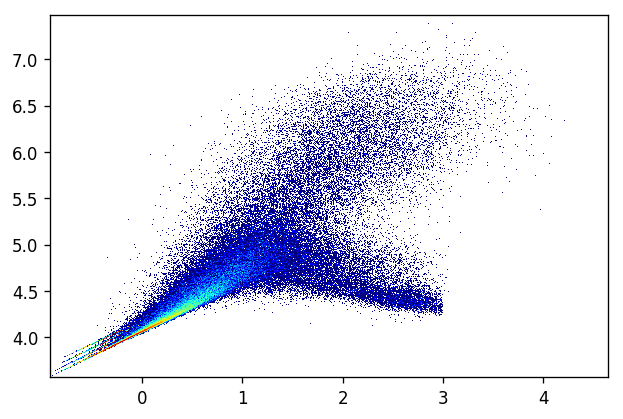

In [7]:
# will store snapshots we actually extracted
snaps_info=[]
for num in range(Nsnap):
    z=zs[num]
    if z < zmax:
        info=extract_skewers.rescale_write_skewers_z(basedir,num=num,skewers_dir=skewers_dir,
                        n_skewers=n_skewers,width_Mpc=width_Mpc,scales_T0=scales_T0,scales_gamma=scales_gamma)
        snaps_info.append(info)